# 0.导包、导数据

In [1]:
import xgboost as xgb
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csc_matrix

from sklearn.ensemble import RandomForestClassifier  
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.cross_validation import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import TimeSeriesSplit

import warnings,datetime,gc
warnings.filterwarnings('ignore')

/home/sunshuchong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sunshuchong/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1.B榜特征合并（减少计算）

In [3]:
# # buy count
# t = pd.read_pickle('../2.data/myfeature/buy_and_browse_count_7')
# t = t.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/buy_count_7')
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan

# res = t1.append(t.loc[:,:'user_id-shop_id-buy-count-7'])
# res.to_pickle('../2.data/myfeature/buy_count_7')

In [25]:
# # browse-count
# t = pd.read_pickle('../2.data/myfeature/buy_and_browse_count_7')
# t = t.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/browse_count_7')
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan

# res = t1.append(t.loc[:,'item_id-browse-count-7':])
# res.to_pickle('../2.data/myfeature/browse_count_7')

In [30]:
# # ratio
# t = pd.read_pickle('../2.data/myfeature/ratio_7')
# t = t.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/ratio_7')
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan

# res = t1.append(t)
# res.to_pickle('../2.data/myfeature/ratio_7')

In [14]:
# names = [
#     'item_id_browse_count_hour_ago_3600',
#     'user_id_browse_count_hour_ago_3600',
#     'shop_id_browse_count_hour_ago_3600',
#     'item_id-item_brand_id_browse_count_hour_ago_3600',
#     'item_id-user_id_browse_count_hour_ago_3600',
#     'item_id-shop_id_browse_count_hour_ago_3600',
#     'item_brand_id-user_id_browse_count_hour_ago_3600',
#     'item_brand_id-shop_id_browse_count_hour_ago_3600',
#     'user_id-shop_id_browse_count_hour_ago_3600',
# ]
# now = pd.DataFrame()
# for name in names:
#     t = pd.read_pickle('../2.data/myfeature/temp/' + name)
#     now = pd.concat([now,t],axis = 1)
# now = now.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/browse_count_hour_ago_3600')
# t1.drop(['item_brand_id-browse-count-hour-ago-3600'],axis = 1,inplace = True)
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan
# res = t1.append(now)
# res.to_pickle('../2.data/myfeature/browse_count_hour_ago_3600')

In [19]:
# names = [
#     'item_brand_id-shop_id_browse_count_hour_ago_1800',
#     'item_brand_id-user_id_browse_count_hour_ago_1800',
#     'item_id_browse_count_hour_ago_1800',
#     'item_id-item_brand_id_browse_count_hour_ago_1800',
#     'item_id-shop_id_browse_count_hour_ago_1800',
#     'item_id-user_id_browse_count_hour_ago_1800',
#     'shop_id_browse_count_hour_ago_1800',
#     'user_id_browse_count_hour_ago_1800',
#     'user_id-shop_id_browse_count_hour_ago_1800',
# ]

# now = pd.DataFrame()
# for name in names:
#     t = pd.read_pickle('../2.data/myfeature/temp/' + name)
#     now = pd.concat([now,t],axis = 1)
# now = now.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/browse_count_hour_ago_1800')
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan
# res = t1.append(now)
# res.to_pickle('../2.data/myfeature/browse_count_hour_ago_1800')

In [23]:
# names = [
#     'item_id_browse_count_hour_ago_900',
#     'user_id_browse_count_hour_ago_900',
#     'shop_id_browse_count_hour_ago_900',
#     'item_id-item_brand_id_browse_count_hour_ago_900',
#     'item_id-user_id_browse_count_hour_ago_900',
#     'item_id-shop_id_browse_count_hour_ago_900',
#     'item_brand_id-user_id_browse_count_hour_ago_900',
#     'item_brand_id-shop_id_browse_count_hour_ago_900',
#     'user_id-shop_id_browse_count_hour_ago_900',
# ]

# now = pd.DataFrame()
# for name in names:
#     t = pd.read_pickle('../2.data/myfeature/temp/' + name)
#     now = pd.concat([now,t],axis = 1)
# now = now.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/browse_count_hour_ago_900')
# t1.drop(['item_brand_id-browse-count-hour-ago-900'],axis =1,inplace = True)
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan
# res = t1.append(now)
# res.to_pickle('../2.data/myfeature/browse_count_hour_ago_900')

In [30]:
# names = [
#     'item_id-last-browse-time-interval',
#     'user_id-last-browse-time-interval',
#     'shop_id-last-browse-time-interval',
#     'item_id-item_brand_id-last-browse-time-interval',
#     'item_id-user_id-last-browse-time-interval',
#     'item_id-shop_id-last-browse-time-interval',
#     'item_brand_id-user_id-last-browse-time-interval',
# #     'item_brand_id-shop_id-last-browse-time-interval',
#     'user_id-shop_id-last-browse-time-interval',
# ]

# now = pd.DataFrame()
# for name in names:
#     t = pd.read_pickle('../2.data/myfeature/temp/' + name)
#     now = pd.concat([now,t],axis = 1)
# now = now.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/last_browse_time_interval')
# t1.drop(['item_brand_id-last-browse-time-interval','item_brand_id-shop_id-last-browse-time-interval'],axis =1,inplace = True)
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan
# res = t1.append(now)
# res.to_pickle('../2.data/myfeature/last_browse_time_interval')

In [35]:
# names = [
#    'item_brand_id-shop_id-next-browse-time-interval',
#    'item_brand_id-user_id-next-browse-time-interval',
#    'item_id-next-browse-time-interval',
#    'item_id-item_brand_id-next-browse-time-interval',
#    'item_id-shop_id-next-browse-time-interval',
#    'item_id-user_id-next-browse-time-interval',
#    'shop_id-next-browse-time-interval',
#    'user_id-next-browse-time-interval',
#    'user_id-shop_id-next-browse-time-interval'
# ]

# now = pd.DataFrame()
# for name in names:
#     t = pd.read_pickle('../2.data/myfeature/temp/' + name)
#     now = pd.concat([now,t],axis = 1)
# now = now.iloc[10432036:]

# t1 = pd.read_pickle('../2.data/myfeature-a/next_browse_time_interval')
# t1.drop(['item_brand_id-next-browse-time-interval'],axis =1,inplace = True)
# t1 = t1.iloc[:10432036]
# t1[t1 == -1] = np.nan
# res = t1.append(now)
# res.to_pickle('../2.data/myfeature/next_browse_time_interval')

# 2.构造完整数据集

In [2]:
feature_dic = {
    # 1.我的
    'buy_and_browse_count_7':{ # 待确定
       'item_id-browse-count-7', 
       'item_brand_id-browse-count-7',
       'user_id-browse-count-7', 
       'shop_id-browse-count-7',
       'item_id-item_brand_id-browse-count-7',
       'item_id-user_id-browse-count-7', 
       'item_id-shop_id-browse-count-7',
       'item_brand_id-user_id-browse-count-7',
       'item_brand_id-shop_id-browse-count-7',
       'user_id-shop_id-browse-count-7',
        
       'item_id-buy-count-7', 
       'item_brand_id-buy-count-7',
       'user_id-buy-count-7', 
       'shop_id-buy-count-7',
       'item_id-item_brand_id-buy-count-7', 
       'item_id-user_id-buy-count-7',
       'item_id-shop_id-buy-count-7', 
       'item_brand_id-user_id-buy-count-7',
       'item_brand_id-shop_id-buy-count-7', 
       'user_id-shop_id-buy-count-7',
    },
    'ratio_7':{
        'item_id-ratio-7', 
        'item_brand_id-ratio-7', 
        'user_id-ratio-7',
        'shop_id-ratio-7', 
        'item_id-item_brand_id-ratio-7',
        'item_id-user_id-ratio-7', 
        'item_id-shop_id-ratio-7',
        'item_brand_id-user_id-ratio-7', 
        'item_brand_id-shop_id-ratio-7',
        'user_id-shop_id-ratio-7'
    },
    'proportion':{  # 效果不好
        'item_collected_level-item_pv_level-proportion',
        'item_sales_level-item_collected_level-proportion',
        'item_sales_level-item_pv_level-proportion',
    },
#     'browse_count_hour_ago_900':{
#        'item_id-browse-count-hour-ago-900',
#        'user_id-browse-count-hour-ago-900',
#        'shop_id-browse-count-hour-ago-900',
#        'item_id-item_brand_id-browse-count-hour-ago-900',
#        'item_id-user_id-browse-count-hour-ago-900',
#        'item_id-shop_id-browse-count-hour-ago-900',
#        'item_brand_id-user_id-browse-count-hour-ago-900',
#        'item_brand_id-shop_id-browse-count-hour-ago-900',
#        'user_id-shop_id-browse-count-hour-ago-900',
# #         'item_brand_id-browse-count-hour-ago-900',
#     },
#     'browse_count_hour_ago_1800':{
#        'item_brand_id-shop_id-browse-count-hour-ago-1800',
#        'item_brand_id-user_id-browse-count-hour-ago-1800',
#        'item_id-browse-count-hour-ago-1800',
#        'item_id-item_brand_id-browse-count-hour-ago-1800',
#        'item_id-shop_id-browse-count-hour-ago-1800',
#        'item_id-user_id-browse-count-hour-ago-1800',
#        'shop_id-browse-count-hour-ago-1800',
#        'user_id-browse-count-hour-ago-1800',
#        'user_id-shop_id-browse-count-hour-ago-1800',
# #         'item_brand_id-browse-count-hour-ago-1800',
#     },
#     'browse_count_hour_ago_3600':{
#         'item_id-browse-count-hour-ago-3600',
#        'user_id-browse-count-hour-ago-3600',
#        'shop_id-browse-count-hour-ago-3600',
#        'item_id-item_brand_id-browse-count-hour-ago-3600',
#        'item_id-user_id-browse-count-hour-ago-3600',
#        'item_id-shop_id-browse-count-hour-ago-3600',
#        'item_brand_id-user_id-browse-count-hour-ago-3600',
#        'item_brand_id-shop_id-browse-count-hour-ago-3600',
#        'user_id-shop_id-browse-count-hour-ago-3600',
# #         'item_brand_id-browse-count-hour-ago-3600',
#     },
    'browse_count_today':{
        'item_id-browse-count-today', 
        'item_brand_id-browse-count-today',
       'user_id-browse-count-today', 
        'shop_id-browse-count-today',
       'item_id-item_brand_id-browse-count-today',
       'item_id-user_id-browse-count-today',
       'item_id-shop_id-browse-count-today',
       'item_brand_id-user_id-browse-count-today',
       'item_brand_id-shop_id-browse-count-today',
       'user_id-shop_id-browse-count-today',
    },
    'browse_count_tohour':{
        'item_id-browse-count-tohour', 
        'item_brand_id-browse-count-tohour',
       'user_id-browse-count-tohour', 
        'shop_id-browse-count-tohour',
       'item_id-item_brand_id-browse-count-tohour',
       'item_id-user_id-browse-count-tohour',
       'item_id-shop_id-browse-count-tohour',
       'item_brand_id-user_id-browse-count-tohour',
       'item_brand_id-shop_id-browse-count-tohour',
       'user_id-shop_id-browse-count-tohour'
    },
    'day_browse_is_last':{
        'user_id-day-browse-is-first', 
        'user_id-day-browse-is-last'
    },
    'hour_browse_is_last':{
        'user_id-hour-browse-is-first', 
        'user_id-hour-browse-is-last'
    },
    'last_browse_time_interval':{
        'item_id-last-browse-time-interval',
       'user_id-last-browse-time-interval',
       'shop_id-last-browse-time-interval',
       'item_id-item_brand_id-last-browse-time-interval',
       'item_id-user_id-last-browse-time-interval',
       'item_id-shop_id-last-browse-time-interval',
       'item_brand_id-user_id-last-browse-time-interval',
       'user_id-shop_id-last-browse-time-interval',
        'item_brand_id-shop_id-last-browse-time-interval',
#       'item_brand_id-last-browse-time-interval',
        
    },
    'next_browse_time_interval':{
        'item_brand_id-shop_id-next-browse-time-interval',
       'item_brand_id-user_id-next-browse-time-interval',
       'item_id-next-browse-time-interval',
       'item_id-item_brand_id-next-browse-time-interval',
       'item_id-shop_id-next-browse-time-interval',
       'item_id-user_id-next-browse-time-interval',
       'shop_id-next-browse-time-interval',
       'user_id-next-browse-time-interval',
       'user_id-shop_id-next-browse-time-interval',
#         'item_brand_id-next-browse-time-interval',
    },
#     'embedding-similarity':{
#         'embedding-similarity',
#     },
    'property-jaccard':{
        'property-jaccard',
    },
    
#     # 2.冲哥

    
#     # 3.浩彬

}

In [4]:
# start = datetime.datetime.now()

# data = pd.read_pickle('../2.data/data')
# data.drop([
#     'instance_id',
#     'item_category_list',
# #     'item_category_list:1',
# #     'item_category_list:2',
# #     'item_category_list:3',
#     'item_property_list',
# #     'user_gender_id',
# #     'user_occupation_id',
#     'context_id',
#     'predict_category_property',
#     'flag'
# ], axis=1,inplace = True)
# gc.collect()

# # 2.读做的特征
# features = pd.DataFrame()

# # 2.1concat以时间为index的数据
# dir_pre = '../2.data/myfeature/'
# file_names = [
#     'buy_and_browse_count_7', # 待确定
#     'ratio_7',
#     'proportion',  # 效果不好
# #     'browse_count_hour_ago_3600',
# #     'browse_count_hour_ago_1800',
# #     'browse_count_hour_ago_900',
#     'browse_count_today',
#     'browse_count_tohour',
#     'day_browse_is_last',
#     'hour_browse_is_last',
#     'last_browse_time_interval',
#     'next_browse_time_interval',
#     'property-jaccard',
# ]
# for file_name in file_names:
#     temp = pd.read_pickle(dir_pre + file_name)
#     features = pd.concat([
#         features,
#         temp,
#     ],axis = 1,copy = False)
#     del temp
#     gc.collect()

# # 2.2所有特征合并
# data = pd.concat([
#         data.iloc[:,:-1],
#         features,
#         data['label'],
#     ],axis = 1,copy = False)
# gc.collect()

# del features
# gc.collect()
# data.to_pickle('../2.data/data_all')
# del data
# gc.collect()
# print(datetime.datetime.now() - start)

0:03:22.541646


In [4]:
# start = datetime.datetime.now()
# features = pd.DataFrame()

# # 1.concat孙树冲的特征
# dir_pre = '../../round-2/featFile/'
# file_names = [
#     'catFeat.csv',
#     'clickTradeRatioFeat.csv',
#     'preDayClickCountFeat.csv',
#     'shiftDayItemClickCountFeat.csv',
#     'shiftDayShopClickCountFeat.csv',
#     'shopFeat.csv',
#     'singleCvrFeat.csv',
#     'timeFeat.csv',
#     'userDayClickRankFeat.csv',
# ]
# for file_name in file_names:
#     temp = pd.read_csv(dir_pre + file_name)
#     temp.index = range(len(temp))
#     features = pd.concat([
#         features,
#         temp,
#     ],axis = 1,copy = False)
#     del temp
#     gc.collect()
    
# # 2.concat潘浩彬的特征
# dir_pre = '../2.data/haobinfeature/'
# file_names = [
#     'simple_uesful_features.csv',
# ]
# for file_name in file_names:
#     temp = pd.read_csv(dir_pre + file_name)
#     temp.index = range(len(temp))
#     features = pd.concat([
#         features,
#         temp,
#     ],axis = 1,copy = False)
#     del temp
#     gc.collect()
    
# features.to_pickle('../2.data/data_all2')

# # 3.drop无用特征与多余特征
# data.drop([
#     'index',
#     'day', 
#     'hour', 
#     'minute',
# ], axis=1,inplace = True)

# del features
# gc.collect()

# print(datetime.datetime.now() - start)

0:04:45.960007


In [ ]:
# def func(x):
#     print(x.name)
#     if('uint' in str(x.dtype)):
#         return pd.to_numeric(x,downcast = 'unsigned')
#     elif('int' in str(x.dtype)):
#         return pd.to_numeric(x,downcast = 'integer')
#     elif('float' in str(x.dtype)):
#         return pd.to_numeric(x,downcast = 'float')
#     else:
#         print(x.name + 'Wrong')

# data = data.apply(func,axis = 0)

# print(data.dtypes)

# data.to_pickle('../2.data/data_all2_compress')

# data_all = pd.concat([
#     pd.read_pickle('../2.data/data_all1_compress'),
#     pd.read_pickle('../2.data/data_all2_compress'),
# ],axis = 1)
# data_all.to_pickle('../2.data/data_all_compress')

# dcolu = set(data_all.columns.values)
# fcolu = set([])
# for now in feature_dic:
#     fcolu = fcolu | feature_dic[now]
# print(fcolu - dcolu,dcolu - fcolu)

# for x in data.columns:
#     try:
#         if('float64' in str(data[x].dtype)):
#             gc.collect()
#             data[x] = data[x].astype('float32')
#             print(x)
#     except:
#         print(x)

In [3]:
# 1.读取数据集
data = pd.read_pickle('../2.data/data_all')
data.sort_values(['index'],inplace = True)
data.drop(['index'],axis = 1,inplace = True)
gc.collect()

# 2.划分测试集
train_and_val = data.iloc[:10432036]
gc.collect()
feature_test = data.iloc[10951924:]
gc.collect()
feature_test.drop('label',inplace = True,axis = 1)
gc.collect()
train_and_val.sort_values(['context_timestamp'],inplace = True)

del data
gc.collect()

15

In [4]:
# # 0-5、7号训练，6号验证
# feature_train = train_and_val[train_and_val['context_timestamp:day'] != 6]
# label_train = train_and_val[train_and_val['context_timestamp:day'] != 6].loc[:,'label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# feature_val = train_and_val[train_and_val['context_timestamp:day'] == 6]
# label_val = train_and_val[train_and_val['context_timestamp:day'] == 6].loc[:,'label']
# feature_val.drop(['label'],inplace = True,axis = 1)

In [18]:
# # 0-5号训练，6号验证
# feature_train = train_and_val[(train_and_val['context_timestamp:day'] != 6) & (train_and_val['context_timestamp:day'] != 7)]
# label_train = train_and_val[(train_and_val['context_timestamp:day'] != 6) & (train_and_val['context_timestamp:day'] != 7)].loc[:,'label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# feature_val = train_and_val[train_and_val['context_timestamp:day'] == 6]
# label_val = train_and_val[train_and_val['context_timestamp:day'] == 6].loc[:,'label']
# feature_val.drop(['label'],inplace = True,axis = 1)

In [175]:
# # 6号+7号上午
# feature_train = train_and_val[(train_and_val['context_timestamp:day'] != 6) & (train_and_val['context_timestamp:day'] != 7)]
# label_train = train_and_val[(train_and_val['context_timestamp:day'] != 6) & (train_and_val['context_timestamp:day'] != 7)].loc[:,'label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# feature_val = train_and_val[(train_and_val['context_timestamp:day'] == 6) | (train_and_val['context_timestamp:day'] == 7)]
# label_val = train_and_val[(train_and_val['context_timestamp:day'] == 6) | (train_and_val['context_timestamp:day'] == 7)].loc[:,'label']
# feature_val.drop(['label'],inplace = True,axis = 1)

In [11]:
# # 6号下午+7号上午
# feature_train = train_and_val[(train_and_val['context_timestamp:day'] <= 5) | ((train_and_val['context_timestamp:day'] == 6) & (train_and_val['context_timestamp:hour'] <= 12))]
# label_train = train_and_val[(train_and_val['context_timestamp:day'] <= 5) | ((train_and_val['context_timestamp:day'] == 6) & (train_and_val['context_timestamp:hour'] <= 12))].loc[:,'label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# feature_val = train_and_val[((train_and_val['context_timestamp:day'] == 6) & (train_and_val['context_timestamp:hour'] > 12)) | (train_and_val['context_timestamp:day'] == 7)]
# label_val = train_and_val[((train_and_val['context_timestamp:day'] == 6) & (train_and_val['context_timestamp:hour'] > 12)) | (train_and_val['context_timestamp:day'] == 7)].loc[:,'label']
# feature_val.drop(['label'],inplace = True,axis = 1)

In [4]:
# 7号4/5训练，7号1/5验证
train_and_val = train_and_val[train_and_val['context_timestamp:day'] == 7]

feature_train = train_and_val[train_and_val['context_timestamp:hour'] <= 10]
label_train = train_and_val[train_and_val['context_timestamp:hour'] <= 10]['label']
feature_train.drop(['label'],inplace = True,axis = 1)

feature_val = train_and_val[train_and_val['context_timestamp:hour'] >= 11]
label_val = train_and_val[train_and_val['context_timestamp:hour'] >= 11]['label']
feature_val.drop(['label'],inplace = True,axis = 1)

gc.collect()

0

In [5]:
# 1.定义需要的特征
now_feature_dic = {
    # 1.1glq
    'buy_and_browse_count_7', # 待确定
    'ratio_7',
#     'proportion',  # 效果不好
    'browse_count_today',
    'browse_count_tohour',
    'day_browse_is_last',
    'hour_browse_is_last',
#     'browse_count_hour_ago_3600',
#     'browse_count_hour_ago_1800',
#     'browse_count_hour_ago_900',
    'last_browse_time_interval',
    'next_browse_time_interval',
    
#     'embedding-similarity',  # 效果不好
    'property-jaccard',
    
    # 1.2冲哥
#     'catFeat.csv',
#     'shiftDayItemClickCountFeat.csv',
#     'shiftDayShopClickCountFeat.csv',
#     'clickTradeRatioFeat.csv',
#     'preDayClickCountFeat.csv',
#     'shopFeat.csv',
#     'singleCvrFeat.csv',
#     'timeFeat.csv',
#     'userDayClickRankFeat.csv',
    
    # 1.3浩彬
#     'simple_uesful_features.csv',
}

# 2.删除特征
to_delete = []
# 2.1删除未被选中的特征
for now in feature_dic:
    if(now not in now_feature_dic):
        to_delete += list(feature_dic[now])
# 2.2删除单独特征
single = {
#     'day','hour','minute', # 重复特征
}
to_delete += single
# 2.3删除以上特征
train_and_val.drop(to_delete,axis = 1,inplace = True)
feature_test.drop(to_delete,axis = 1,inplace = True)

gc.collect()

0

In [5]:
# #  0-5号+7号4/5训练，6号+7号1/5验证
# train_zero_to_five = train_and_val[(train_and_val['context_timestamp:day'] <= 4) & (train_and_val['context_timestamp:day'] >= 1)]
# gc.collect()
# train_seven = train_and_val[train_and_val['context_timestamp:day'] == 7].iloc[:861740]
# gc.collect()
# val_zero_to_five = train_and_val[train_and_val['context_timestamp:day'] == 5]
# gc.collect()
# val_seven = train_and_val[train_and_val['context_timestamp:day'] == 7].iloc[861741:]
# gc.collect()

# feature_train = train_zero_to_five.append(train_seven)
# gc.collect()
# feature_val = val_zero_to_five.append(val_seven)
# del train_zero_to_five,train_seven,val_zero_to_five,val_seven
# gc.collect()

# label_train = feature_train.loc[:,'label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# label_val = feature_val.loc[:,'label']
# feature_val.drop(['label'],inplace = True,axis = 1)

# gc.collect()

0

In [10]:
# # 7号上午11点验证
# feature_train = train_and_val[((train_and_val['context_timestamp:day'] <= 5) & (train_and_val['context_timestamp:day'] >= 1)) | ((train_and_val['context_timestamp:day'] == 7) & (train_and_val['context_timestamp:hour'] != 11))]
# label_train= feature_train['label']
# feature_train.drop(['label'],inplace = True,axis = 1)

# feature_val = train_and_val[(train_and_val['context_timestamp:day'] == 7) & (train_and_val['context_timestamp:hour'] == 11)]
# label_val= feature_val['label']
# feature_val.drop(['label'],inplace = True,axis = 1)

# gc.collect()

0

In [9]:
print(feature_train.shape,feature_val.shape,feature_test.shape)
for i in feature_test.columns:
    print(i)

(950233, 114) (126942, 114) (1209768, 111)
item_id
item_category_list:1
item_category_list:2
item_category_list:3
item_brand_id
item_city_id
item_price_level
item_sales_level
item_collected_level
item_pv_level
user_id
user_gender_id
user_gender_id:_0.0
user_gender_id:_1.0
user_gender_id:_2.0
user_gender_id:_nan
user_age_level
user_occupation_id
user_occupation_id__2002.0
user_occupation_id__2003.0
user_occupation_id__2004.0
user_occupation_id__2005.0
user_occupation_id__nan
user_star_level
context_timestamp
context_timestamp:day
context_timestamp:hour
context_timestamp:minute
context_timestamp:second
context_timestamp:dayofweek
context_page_id
shop_id
shop_review_num_level
shop_review_positive_rate
shop_star_level
shop_score_service
shop_score_delivery
shop_score_description
item_id-buy-count-7
item_brand_id-buy-count-7
user_id-buy-count-7
shop_id-buy-count-7
item_id-item_brand_id-buy-count-7
item_id-user_id-buy-count-7
item_id-shop_id-buy-count-7
item_brand_id-user_id-buy-count-7
item

In [ ]:
del feature_test
gc.collect()

# 1.lightgbm

In [7]:
to_del = [
    'item_category_list_2_3.949153947410967e+17',
'item_category_list_2_4.535254803665509e+17',
'item_category_list_2_5.974242234565864e+17',
'item_category_list_2_7.685797875215753e+17',
'item_category_list_2_9.262054013029023e+17',
'item_category_list_2_1.1470741689685322e+18',
'item_category_list_2_1.3671771540733827e+18',
'item_category_list_2_1.8526005172650624e+18',
'item_category_list_2_1.909641874861641e+18',
'item_category_list_2_1.9163903451332127e+18',
'item_category_list_2_1.9200841681043348e+18',
'item_category_list_2_2.211060154630359e+18',
'item_category_list_2_2.8717293836713016e+18',
'item_category_list_2_3.0892543029476204e+18',
'item_category_list_2_3.348197449185791e+18',
'item_category_list_2_3.434689896486063e+18',
'item_category_list_2_3.6137835631996273e+18',
'item_category_list_2_4.911723539855588e+18',
'item_category_list_2_5.066527928272239e+18',
'item_category_list_2_5.68569013987941e+18',
'item_category_list_2_6.254910033820815e+18',
'item_category_list_2_6.670526099037031e+18',
'item_category_list_2_6.693726201323252e+18',
'item_category_list_2_7.226013370341272e+18',
'item_category_list_2_7.314150500379498e+18',
'item_category_list_2_7.423553047267511e+18',
'item_category_list_2_8.009556227083202e+18',
'item_category_list_2_8.468007938333143e+18',
'item_category_list_2_8.46837010590862e+18',
'item_category_list_2_8.769426218101861e+18',
'item_category_list_2_8.841625760168847e+18',
'item_category_list_2_nan',
'item_category_list_3_-1.0',
'item_category_list_3_2.4292692654358803e+17',
'item_category_list_3_3.671363205864541e+17',
'item_category_list_3_6.69661864989165e+17',
'item_category_list_3_1.0360823570540439e+18',
'item_category_list_3_1.2112187474183503e+18',
'item_category_list_3_1.4678707293165668e+18',
'item_category_list_3_1.4773376140024678e+18',
'item_category_list_3_1.4953887999089408e+18',
'item_category_list_3_1.5189163023981494e+18',
'item_category_list_3_1.6484457152688369e+18',
'item_category_list_3_1.7737573992370422e+18',
'item_category_list_3_2.0667146032918502e+18',
'item_category_list_3_2.104555450664742e+18',
'item_category_list_3_2.1919081694948444e+18',
'item_category_list_3_2.3942618305577574e+18',
'item_category_list_3_2.633274017530891e+18',
'item_category_list_3_3.0350724682773396e+18',
'item_category_list_3_3.0561722848750684e+18',
'item_category_list_3_3.1239555576744207e+18',
'item_category_list_3_3.124898744105968e+18',
'item_category_list_3_3.492642177859571e+18',
'item_category_list_3_3.8766935579183923e+18',
'item_category_list_3_4.0395627406939643e+18',
'item_category_list_3_4.3324492077594117e+18',
'item_category_list_3_4.4237569224751427e+18',
'item_category_list_3_4.521717672641793e+18',
'item_category_list_3_4.5598378274862894e+18',
'item_category_list_3_4.62004237070379e+18',
'item_category_list_3_4.642777236640082e+18',
'item_category_list_3_4.782940324184009e+18',
'item_category_list_3_4.919080589661355e+18',
'item_category_list_3_4.993377953084092e+18',
'item_category_list_3_5.031957903352581e+18',
'item_category_list_3_5.103300281712297e+18',
'item_category_list_3_5.575767811251205e+18',
'item_category_list_3_5.896127768779494e+18',
'item_category_list_3_5.941301806663871e+18',
'item_category_list_3_6.119230265477212e+18',
'item_category_list_3_6.370392357088947e+18',
'item_category_list_3_6.731593623692005e+18',
'item_category_list_3_6.747145348367564e+18',
'item_category_list_3_6.783634657823732e+18',
'item_category_list_3_6.861763693457621e+18',
'item_category_list_3_7.017624410306476e+18',
'item_category_list_3_7.438434275307066e+18',
'item_category_list_3_7.497531498747093e+18',
'item_category_list_3_7.505733337486864e+18',
'item_category_list_3_7.848078693615387e+18',
'item_category_list_3_7.978017778431587e+18',
'item_category_list_3_8.010602907289638e+18',
'item_category_list_3_8.045794075432612e+18',
'item_category_list_3_8.077497621372666e+18',
'item_category_list_3_8.096917686185033e+18',
'item_category_list_3_8.110966937369051e+18',
'item_category_list_3_8.123435010580049e+18',
'item_category_list_3_8.418308787262291e+18',
'item_category_list_3_8.72739728582695e+18',
'item_category_list_3_8.807331407484389e+18',
'item_category_list_3_8.82646757569844e+18',
'item_category_list_3_9.030622377694665e+18',
'item_category_list_3_nan'
]
feature_train.drop(to_del,axis = 1,inplace =True)
feature_val.drop(to_del,axis = 1,inplace =True)
feature_test.drop(to_del,axis = 1,inplace =True)

In [10]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='binary',
                        num_leaves=64, 
                        
                        min_data_in_leaf=50,
                        
                         learning_rate=0.1,

                         n_estimators=2000
)
gc.collect()

gbm.fit(feature_train, label_train,

        eval_set=[(feature_val, label_val)],

        eval_metric='binary_logloss',

        early_stopping_rounds=100)
gc.collect()

[1]	valid_0's binary_logloss: 0.613953
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.549161
[3]	valid_0's binary_logloss: 0.495303
[4]	valid_0's binary_logloss: 0.450026
[5]	valid_0's binary_logloss: 0.411652
[6]	valid_0's binary_logloss: 0.378864
[7]	valid_0's binary_logloss: 0.350706
[8]	valid_0's binary_logloss: 0.326454
[9]	valid_0's binary_logloss: 0.30546
[10]	valid_0's binary_logloss: 0.287275
[11]	valid_0's binary_logloss: 0.271442
[12]	valid_0's binary_logloss: 0.257666
[13]	valid_0's binary_logloss: 0.245671
[14]	valid_0's binary_logloss: 0.235196
[15]	valid_0's binary_logloss: 0.226067
[16]	valid_0's binary_logloss: 0.218075
[17]	valid_0's binary_logloss: 0.211112
[18]	valid_0's binary_logloss: 0.205004
[19]	valid_0's binary_logloss: 0.199696
[20]	valid_0's binary_logloss: 0.195032
[21]	valid_0's binary_logloss: 0.190987
[22]	valid_0's binary_logloss: 0.187439
[23]	valid_0's binary_logloss: 0.184339
[24]	valid_0's binary_loglo

16

In [9]:
label_val_bgm = gbm.predict(feature_val, num_iteration=gbm.best_iteration_)

data_index = pd.read_table('../2.data/round2_test_b.txt',dtype = np.str,sep = ' ').loc[:,'instance_id']

label_test = gbm.predict(feature_test, num_iteration=gbm.best_iteration_)

print(log_loss(label_val,label_val_bgm))

0.16196566198005127


In [10]:
np.savetxt('../4.result/round1_result_lgb.txt', np.c_[data_index, label_test], delimiter=',', header='instance_id predicted_score',comments='', fmt='%s %f')

# 2.xgboost
这里要重点讲一下 Xgboost 的调参。通常认为对它性能影响较大的参数有：

- eta：每次迭代完成后更新权重时的步长。越小训练越慢。
- num_round：总共迭代的次数。
- subsample：训练每棵树时用来训练的数据占全部的比例。用于防止 Overfitting。
- colsample_bytree：训练每棵树时用来训练的特征的比例，类似 RandomForestClassifier 的 max_features。
- max_depth：每棵树的最大深度限制。与 Random Forest 不同，Gradient Boosting 如果不对深度加以限制，最终是会 Overfit 的。
- early_stopping_rounds：用于控制在 Out Of Sample 的验证集上连续多少个迭代的分数都没有提高后就提前终止训练。用于防止 Overfitting。

一般的调参步骤是：

- 将训练数据的一部分划出来作为验证集。
- 先将 eta 设得比较高（比如 0.1），num_round 设为 300 ~ 500。
- 用 Grid Search 对其他参数进行搜索
- 逐步将 eta 降低，找到最佳值。
- 以验证集为 watchlist，用找到的最佳参数组合重新在训练集上训练。注意观察算法的输出，看每次迭代后在验证集上分数的变化情况，从而得到最佳的 early_stopping_rounds。

## 2.1数据加载

In [9]:
train = xgb.DMatrix(feature_train,label = label_train)
val = xgb.DMatrix(feature_val,label = label_val)
test = xgb.DMatrix(feature_test)

## 2.2训练

In [10]:
param = {
    # 1.General Parameters
    'booster': 'gbtree', # 提升计算的模型，可以是：gbtree, gblinear or dart
    'silent': 0,  # 0为打印信息，1为缄默
    # 'nthread': 4, # XGBoost运行时的线程数
    # 'num_pbuffer': # 预测缓冲区的大小，通常设置为训练实例的数量。缓冲区用于保存最后一次提升步骤的预测结果。
    # 'num_feature': # 特征值数量
    
    # 2.Booster Parameters
    'eta': 0.3,  # 学习率，默认0.3，取值范围为：[0,1]，典型值为0.01-0.2，越小越保守
    'gamma': 0.1,  # 节点分裂所需的最小损失函数下降值，和损失函数息息相关。默认0，典型值0.1、0.2，越大越保守，
    'max_depth': 4,  # 树的最大深度，默认6，典型值为3-10，越大越易过拟合。
    'min_child_weight':1, # 这个参数非常影响结果，最小叶子节点样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数。默认1，越大算法越易欠拟合
    'max_delta_step ':0, # 限制每棵树权重改变的最大步长。越大越保守。通常，这个参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。
    'subsample':0.8, # 用于训练模型的子样本占整个样本集合的比例，行采样，典型值0.5-1，越小越保守。
    'colsample_bytree ': 0.8,  # 在建立树时对特征采样的比例，列采样。典型值0.5-1

    'lambda':10, # 权重的L2正则化项，默认是1
    'alpha':1,# 权重的L1正则化项，默认是1
    'lambda_bias': 0,  # 在偏置上的L2正则。缺省值为0（在L1上没有偏置项的正则，因为L1时偏置不重要）
    # 'scale_pos_weight':0.5, # 各类样本十分不平衡时，把这个参数设置为一个正数，可以使算法更快收敛。默认是1

    # 3.Task Parameters
    # 'tree_method': 'approx',
    'objective': 'binary:logistic',  # 使用的模型，分类的数目
    'eval_metric':'logloss', # 校验数据所需要的评价指标，不同的目标函数将会有缺省的评价指标
    'base_score':0.5, # 对于所有样本预测为正样本的全局偏置（初始分数）。如果迭代次数够多，改变这个参数对结果不会有影响。
    'seed':0 # 随机数的种子
}
num_boost_round = 1000  # 迭代的次数，弱分类器的数量

watchlist = [(train, 'train'),(val, 'val')]  # 看板，每次迭代都可以在控制台打印出训练集与测试集的损失

# obj、feval、early_stopping_rounds、evals_result、verbose_eval、xgb_model

bst = xgb.train(param, train, num_boost_round, evals=watchlist, obj=None, feval=None, maximize=False,
      early_stopping_rounds=100, evals_result=None, verbose_eval=True, xgb_model=None, callbacks=None,learning_rates=None)
bst.save_model('../1.model/model_xgboost')

[0]	train-logloss:0.48283	val-logloss:0.480822
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.368828	val-logloss:0.365283
[2]	train-logloss:0.300092	val-logloss:0.295313
[3]	train-logloss:0.256796	val-logloss:0.250977
[4]	train-logloss:0.229118	val-logloss:0.222426
[5]	train-logloss:0.211426	val-logloss:0.203976
[6]	train-logloss:0.200154	val-logloss:0.192103
[7]	train-logloss:0.193061	val-logloss:0.184512
[8]	train-logloss:0.188618	val-logloss:0.17962
[9]	train-logloss:0.185915	val-logloss:0.176582
[10]	train-logloss:0.184236	val-logloss:0.174675
[11]	train-logloss:0.183183	val-logloss:0.173422
[12]	train-logloss:0.182495	val-logloss:0.172611
[13]	train-logloss:0.182016	val-logloss:0.172057
[14]	train-logloss:0.181686	val-logloss:0.17163
[15]	train-logloss:0.181454	val-logloss:0.171394
[16]	train-logloss:0.181178	val-logloss:0.171143
[17]	train-logloss:0.181029	val-

[164]	train-logloss:0.176904	val-logloss:0.169274
[165]	train-logloss:0.176887	val-logloss:0.169276
[166]	train-logloss:0.176887	val-logloss:0.169277
[167]	train-logloss:0.176855	val-logloss:0.169296
[168]	train-logloss:0.176855	val-logloss:0.169295
[169]	train-logloss:0.176825	val-logloss:0.169312
[170]	train-logloss:0.176825	val-logloss:0.169314
[171]	train-logloss:0.176808	val-logloss:0.169313
[172]	train-logloss:0.176808	val-logloss:0.169313
[173]	train-logloss:0.176775	val-logloss:0.169311
[174]	train-logloss:0.176748	val-logloss:0.169312
[175]	train-logloss:0.176726	val-logloss:0.169313
[176]	train-logloss:0.176708	val-logloss:0.169317
[177]	train-logloss:0.176682	val-logloss:0.169315
[178]	train-logloss:0.176682	val-logloss:0.169315
[179]	train-logloss:0.176682	val-logloss:0.169311
[180]	train-logloss:0.176682	val-logloss:0.169311
[181]	train-logloss:0.176682	val-logloss:0.16931
[182]	train-logloss:0.176656	val-logloss:0.169301
[183]	train-logloss:0.176656	val-logloss:0.169301
[

[329]	train-logloss:0.175757	val-logloss:0.169528
[330]	train-logloss:0.175757	val-logloss:0.169527
[331]	train-logloss:0.175757	val-logloss:0.16952
[332]	train-logloss:0.175757	val-logloss:0.169523
[333]	train-logloss:0.175757	val-logloss:0.169527
[334]	train-logloss:0.175757	val-logloss:0.169524
[335]	train-logloss:0.175757	val-logloss:0.169519
[336]	train-logloss:0.175757	val-logloss:0.169519
[337]	train-logloss:0.175757	val-logloss:0.169517
[338]	train-logloss:0.175757	val-logloss:0.169521
[339]	train-logloss:0.175757	val-logloss:0.169514
Stopping. Best iteration:
[239]	train-logloss:0.176273	val-logloss:0.169217



## 2.3预测

In [13]:
# 预测
label_test_xgb = bst.predict(test)
# 4.保存
np.savetxt('../4.result/round1_result_xgb.txt', np.c_[data_index, label_test_xgb], delimiter=',', header='instance_id predicted_score',comments='', fmt='%s %f')

## 2.4特征重要性排序

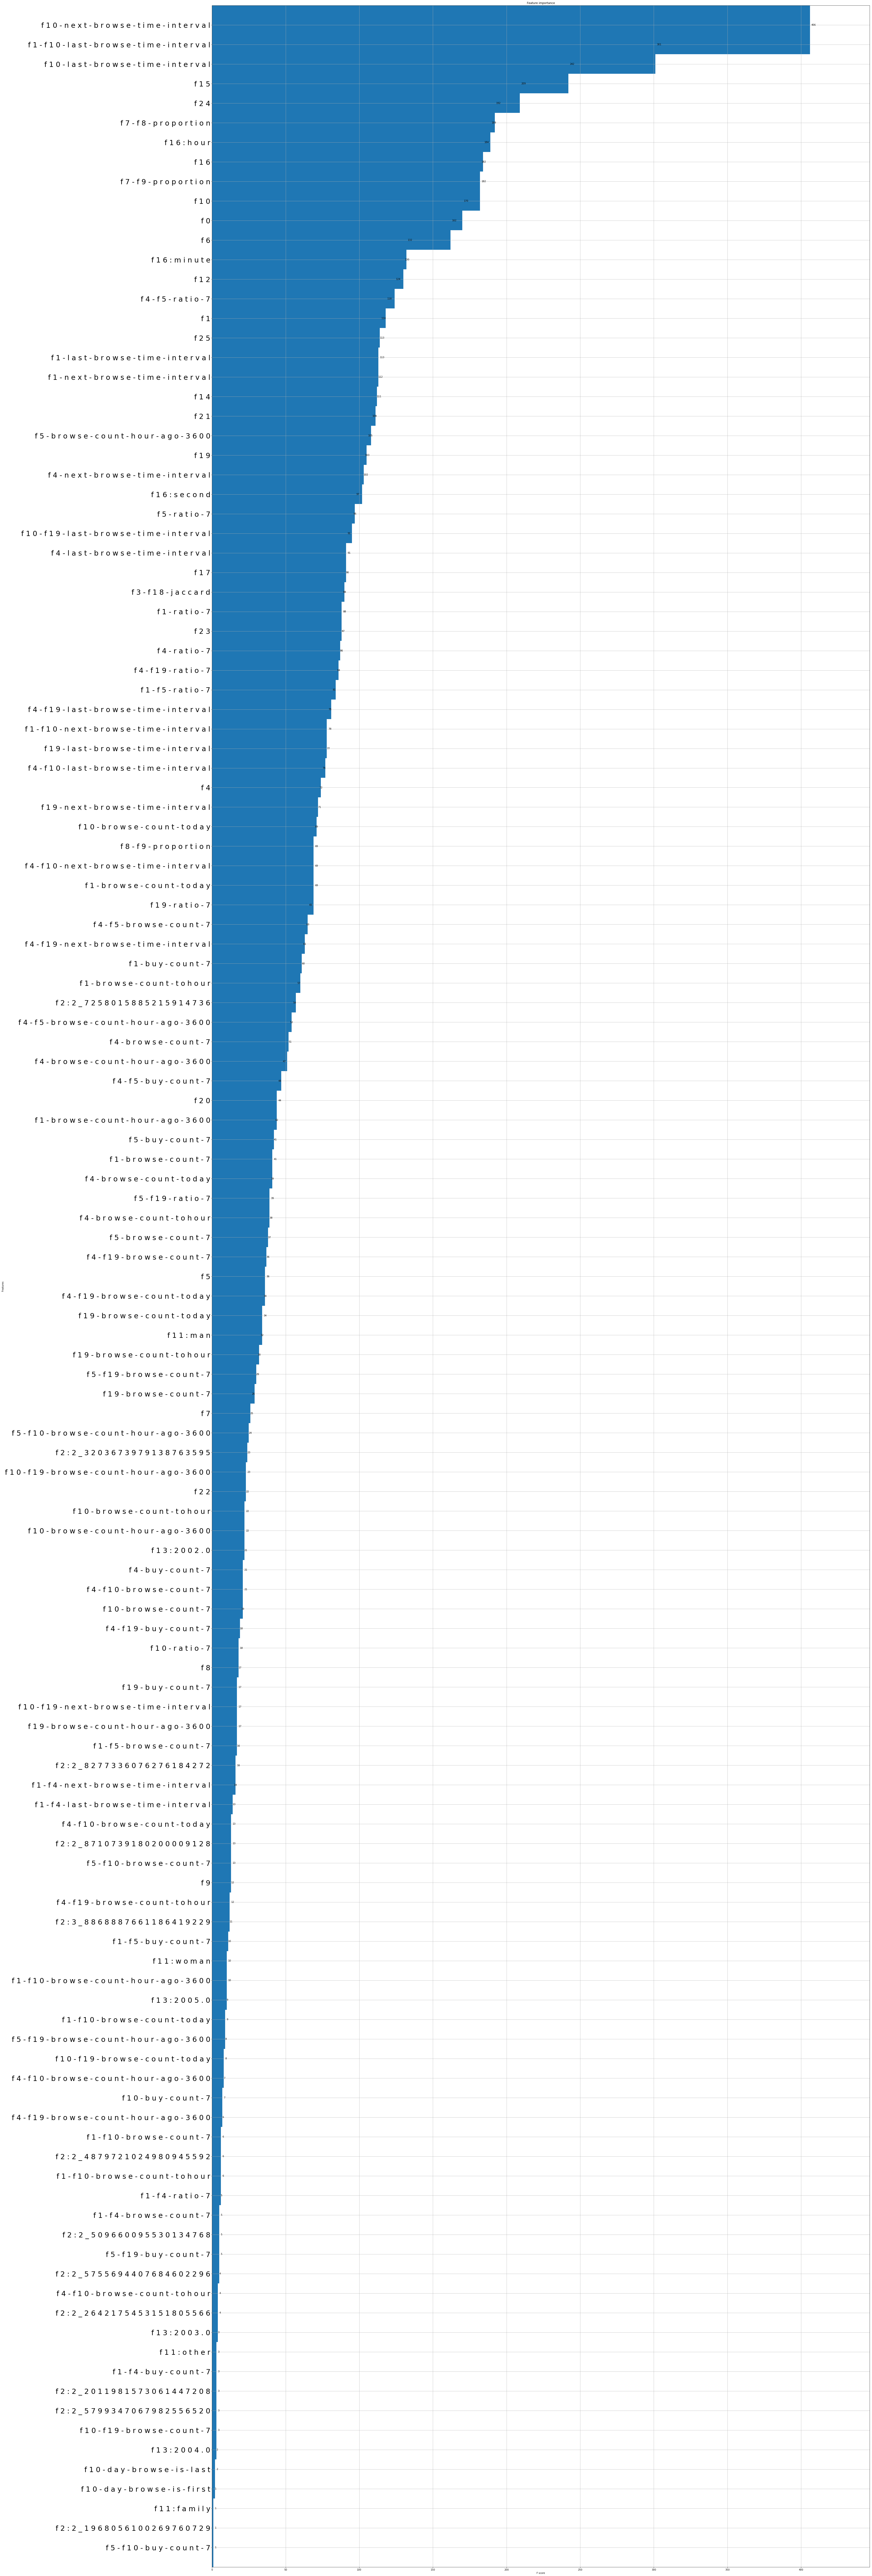

In [52]:
ax = plt.subplot(111)
plt.yticks(fontsize=30)
ax = xgb.plot_importance(bst,ax,height  = 3)
fig = ax.figure
fig.set_size_inches(50, 200)

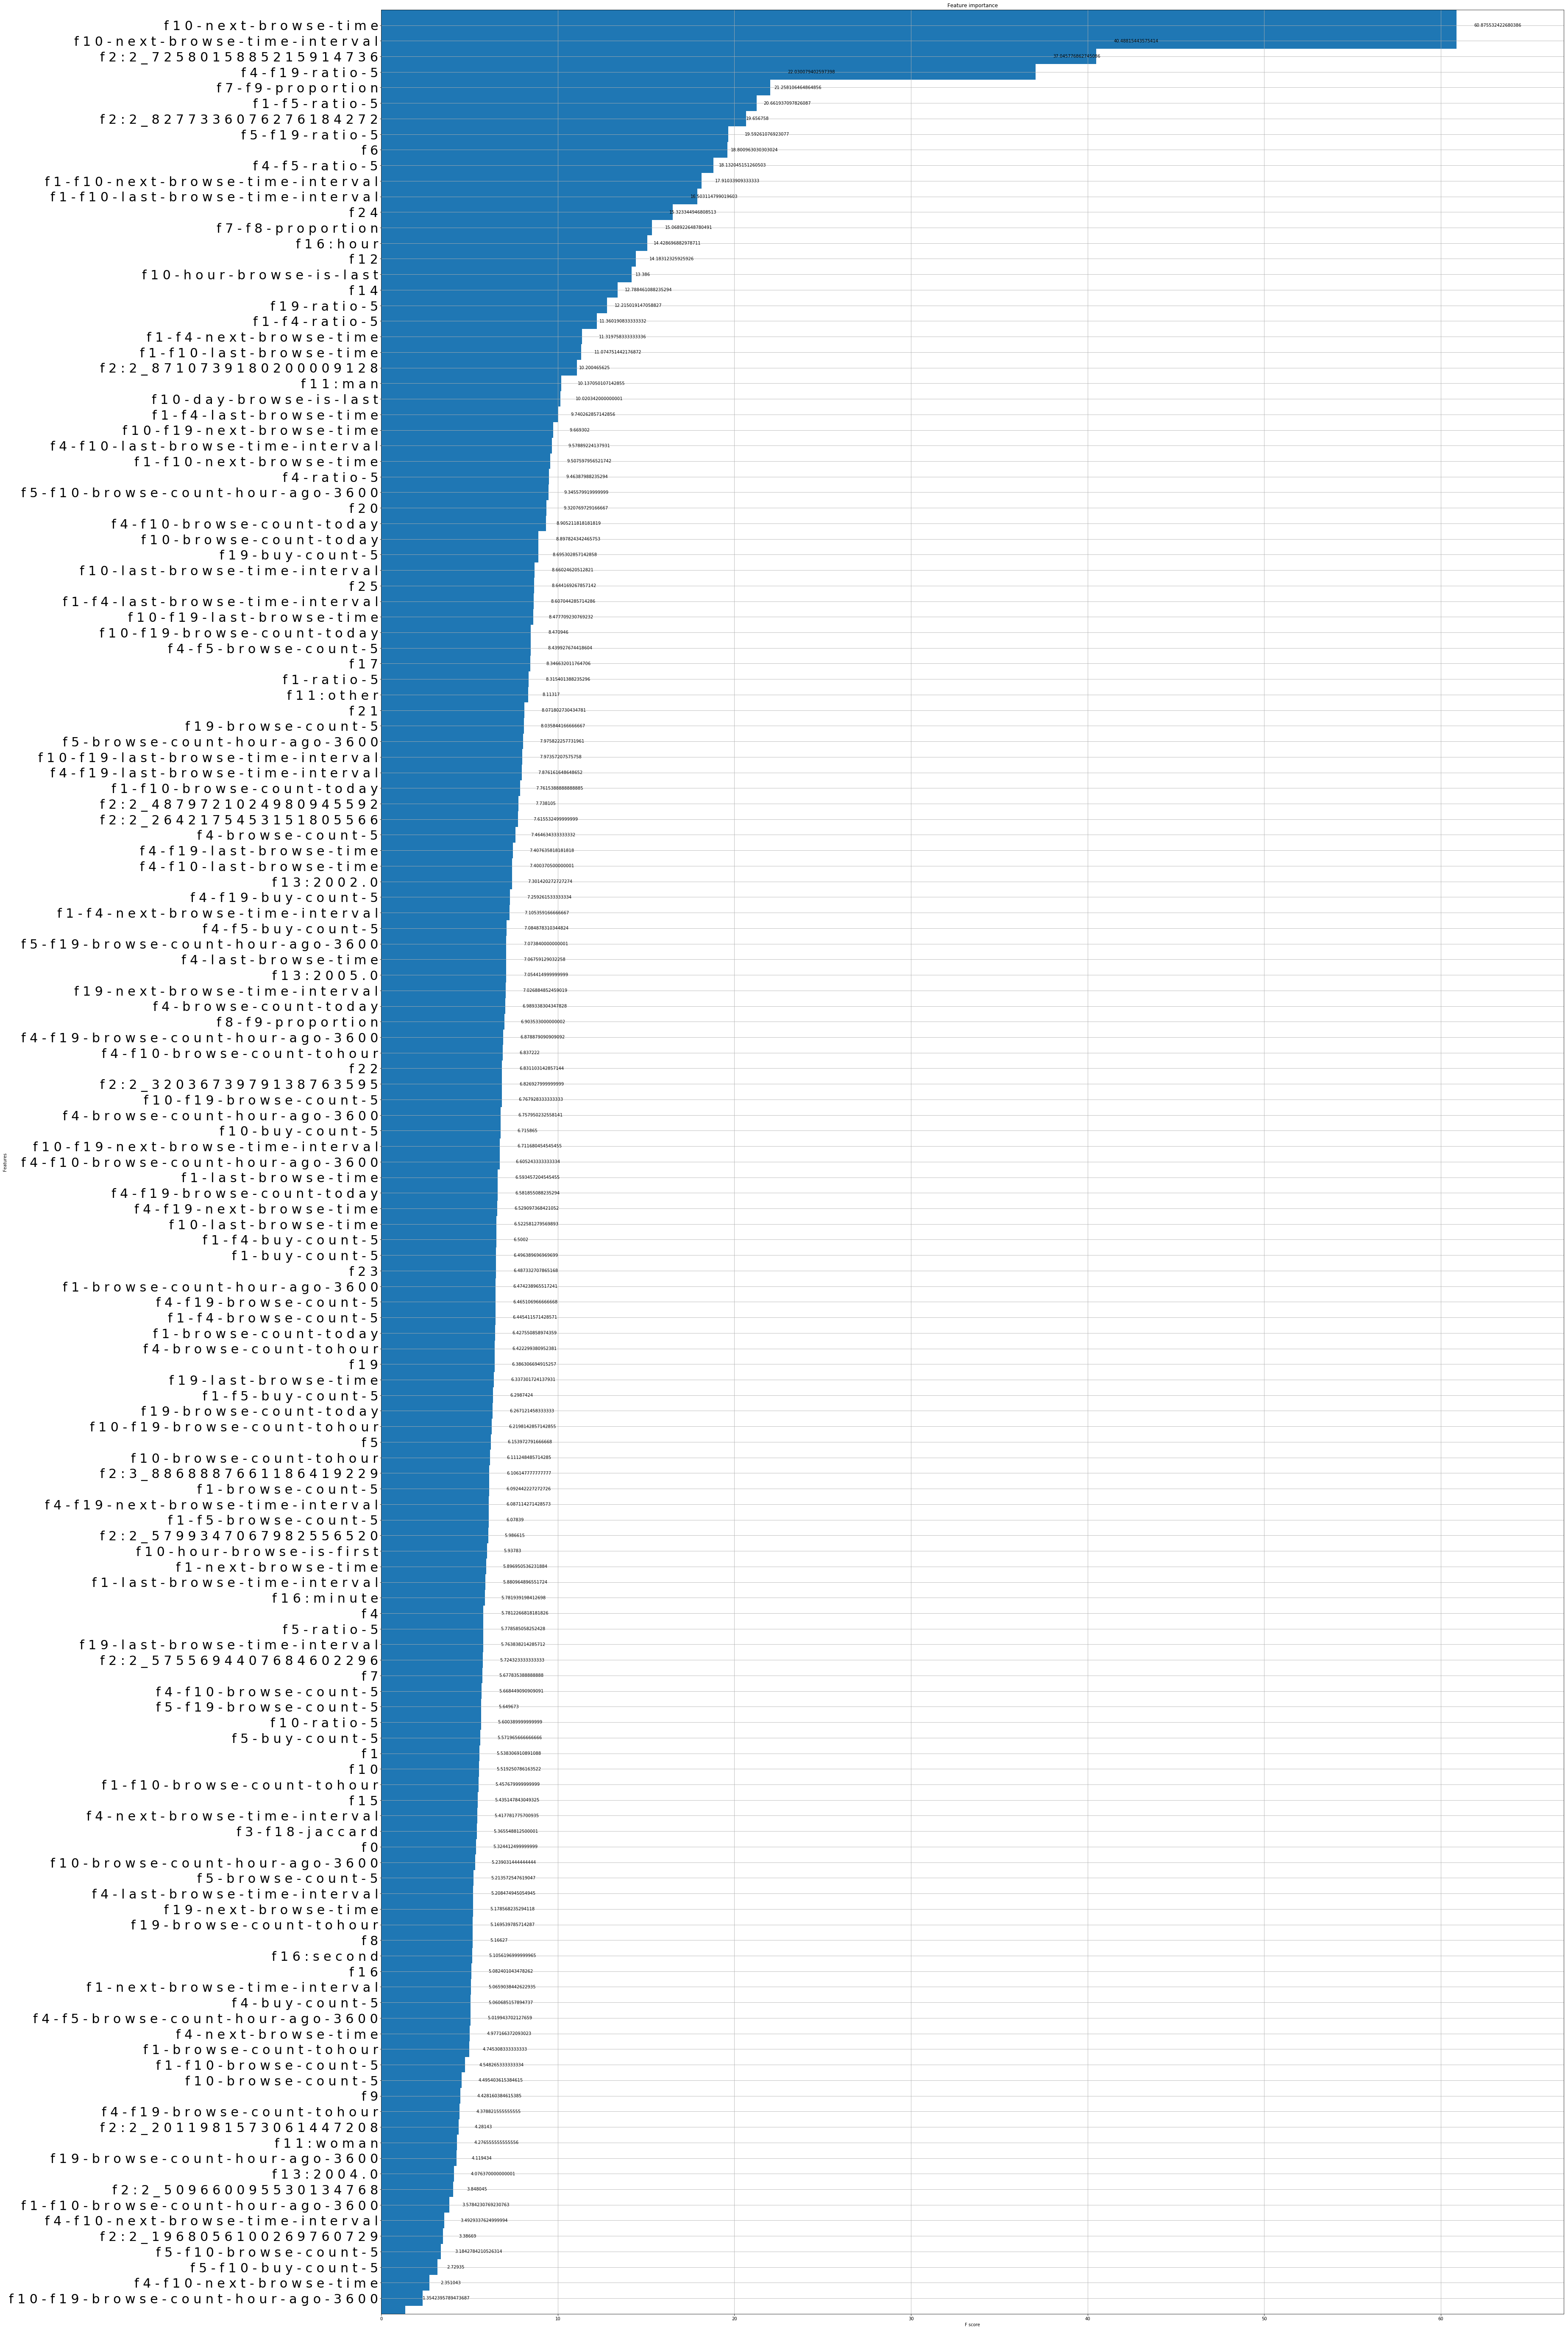

In [8]:
ax = plt.subplot(111)
plt.yticks(fontsize=30)
ax = xgb.plot_importance(bst,ax,importance_type = 'gain',height  = 3)
fig = ax.figure
fig.set_size_inches(50, 100)

## 2.5网格调参

In [61]:
xgb_model = xgb.XGBClassifier()
parameters = {
    # 1.General Parameters
    'booster': ['gbtree'], # 提升计算的模型，可以是：gbtree, gblinear or dart
    'silent': [0],  # 0为打印信息，1为缄默
    'n_jobs': [12], # XGBoost运行时的线程数
    # 'num_pbuffer': # 预测缓冲区的大小，通常设置为训练实例的数量。缓冲区用于保存最后一次提升步骤的预测结果。
    # 'num_feature': # 特征值数量
    
    # 2.Booster Parameters
#     'n_estimators':[400],
    'learning_rate': [0.01,0.03,0.05,0.1,0.15],  # 学习率，默认0.3，取值范围为：[0,1]，典型值为0.01-0.2，越小越保守
    'gamma': [0,0.1,0.2,0.3,0.4,0.5],  # 节点分裂所需的最小损失函数下降值，和损失函数息息相关。默认0，典型值0.1、0.2，越大越保守，
    'max_depth': [3,4,5,6],  # 树的最大深度，默认6，典型值为3-10，越大越易过拟合。
    'min_child_weight':[1], # 这个参数非常影响结果，最小叶子节点样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束。在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数。默认1，越大算法越易欠拟合
#     'max_delta_step':[0], # 限制每棵树权重改变的最大步长。越大越保守。通常，这个参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。
    'subsample':[0.7,0.8,0.9], # 用于训练模型的子样本占整个样本集合的比例，行采样，典型值0.5-1，越小越保守。
    'colsample_bytree': [0.7,0.8,0.9],  # 在建立树时对特征采样的比例，列采样。典型值0.5-1

    'reg_lambda':[1], # 权重的L2正则化项，默认是1
    'reg_alpha':[1],# 权重的L1正则化项，默认是1
#      'lambda_bias': [0],  # 在偏置上的L2正则。缺省值为0（在L1上没有偏置项的正则，因为L1时偏置不重要）
#     'scale_pos_weight':0.5, # 各类样本十分不平衡时，把这个参数设置为一个正数，可以使算法更快收敛。默认是1
    
    # 3.Task Parameters
    # 'tree_method': 'approx',
    'base_score':[0.5], # 对于所有样本预测为正样本的全局偏置（初始分数）。如果迭代次数够多，改变这个参数对结果不会有影响。
    'seed':[0], # 随机数的种子
    'objective':['binary:logistic'],  # 使用的模型，分类的数目
#     'eval_metric':['logloss'], # 校验数据所需要的评价指标，不同的目标函数将会有缺省的评价指标

}
clf = GridSearchCV(xgb_model, parameters,'neg_log_loss',cv = 2,verbose=3, error_score = -1,)

In [ ]:
temp_feature = feature_train.append(feature_val)
temp_label = label_train.append(label_val)
clf.fit(temp_feature,temp_label)

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.7 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.7, score=-1.089408 -  15.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.8s remaining:    0.0s


[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.7, score=-0.243719 -  14.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.3s remaining:    0.0s


[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092202 -  16.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243699 -  15.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, lea

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.093286 -  40.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.242863 -  35.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, lea

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.928119 -  33.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096641 -  30.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, lea

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.987016 -  27.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.094961 -  25.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, lea

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.136122 -  21.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.116766 -  19.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learnin

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.651553 -  41.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.130553 -  37.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learnin

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.392048 -  34.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.129262 -  30.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0, lea

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092396 -  27.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243334 -  24.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.790131 -  21.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.098003 -  19.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.938275 -  39.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096386 -  36.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-2.131550 -  34.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096039 -  30.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.431355 -  27.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.122165 -  25.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.016049 -  22.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.124470 -  19.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.484637 -  40.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.134325 -  36.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092907 -  33.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243071 -  29.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.884471 -  27.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.097059 -  25.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.848500 -  21.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.092716 -  19.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-2.170894 -  40.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096349 -  35.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.561282 -  34.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.127300 -  30.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.271463 -  28.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.129643 -  25.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092149 -  21.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243697 -  19.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.093201 -  38.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.242913 -  34.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.928201 -  33.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096635 -  30.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-2.014258 -  27.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.094976 -  24.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.138705 -  21.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.116766 -  19.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.664610 -  39.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.130522 -  35.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.457344 -  33.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.131402 -  30.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092258 -  26.8s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243331 -  24.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.01, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.796222 -  21.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.098005 -  19.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.938514 -  39.7s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096361 -  36.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.03, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-2.117725 -  34.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096070 -  30.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.352698 -  28.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.121539 -  25.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.182308 -  21.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.124470 -  19.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.571156 -  40.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.134614 -  36.9s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.092785 -  33.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.243070 -  29.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.883674 -  28.6s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.097050 -  25.3s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.03, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-1.827635 -  22.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.092716 -  19.2s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-2.200527 -  42.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.096351 -  37.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-3.630621 -  35.0s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.126921 -  31.4s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.

[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-4.271543 -  28.1s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.8, score=-0.129690 -  25.5s
[CV] base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamma=0.5, learning_rate=0.15, max_depth=4, min_child_weight=1, n_jobs=12, objective=binary:logistic, reg_alpha=1, reg_lambda=1, seed=0, silent=0, subsample=0.9 
[CV]  base_score=0.5, booster=gbtree, colsample_bytree=0.7, gamm

# 3.FM/FFM


In [62]:
label_train[label_train < 0.5] = -1.0

In [63]:
feature_train = csc_matrix(feature_train)

In [64]:
feature_val = csc_matrix(feature_val)

In [65]:
from fastFM import sgd,mcmc
fm = sgd.FMClassification(
#     n_iter=1000, init_stdev=0.1, l2_reg_w=0,l2_reg_V=0, rank=2, step_size=0.1
)
fm.fit(feature_train, label_train)
label_val_fm = fm.predict(feature_val)

# fm = mcmc.FMClassification(n_iter=1000, rank=2, init_stdev=0.1)
# y_pred = fm.fit_predict(X_train, y_train, X_test)
# label_val_fm = fm.fit_predict_proba(X_train, y_train, X_test)

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/fastFM/base.py:123: RuntimeWarning: invalid value encountered in greater
  y_pred[y_proba > .5] = self.classes_[1]


# 4.训练SVM

In [45]:
from sklearn import svm,datasets
from sklearn.metrics import log_loss

#调用SVC()
# 参数见：http://blog.csdn.net/xiaodongxiexie/article/details/70667101
clf = svm.SVC(
            C=0.001, 
            kernel='rbf', 
            degree=3, 
            gamma='auto', 
            coef0=0.0, 
            probability=False, 
            shrinking=True, 
            tol=0.001, 
            cache_size=200, 
            class_weight='balanced', 
            verbose=True, 
            max_iter=1000, 
            decision_function_shape='ovr', 
            random_state=None
)
#载入鸢尾花数据集
iris = datasets.load_iris()

#fit()训练
clf.fit(feature_train,label_train)

#predict()预测
label_val_svm = clf.predict(feature_val)
print(log_loss(label_val,label_val_svm))

[LibSVM]

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


33.957631066


# 5.训练逻辑回归

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss


feature_train_now = StandardScaler().fit_transform(feature_train)


clf_l1_LR= LogisticRegression(
#    tol = 0.0001,C = 0.00005, penalty = 'l1',max_iter = 500,class_weight = 'balanced',verbose = 2
) 
clf_l1_LR.fit(feature_train_now,label_train)
label_val_lr = clf_l1_LR.predict(feature_val)  
print(log_loss(label_val,label_val_lr))


clf_l2_LR= LogisticRegression(
#    tol = 0.0001,C = 0.0001, penalty = 'l2',max_iter = 500,class_weight = 'balanced',verbose = 2
) 
clf_l2_LR.fit(feature_train_now,label_train)
label_val_lr = clf_l2_LR.predict(feature_val)
print(log_loss(label_val,label_val_lr))

1.1711058309
1.1711058309


# 6.AdaBoost

In [55]:
clf = AdaBoostClassifier() #迭代100次  
clf.fit(feature_train,label_train)
label_val_lr = clf.predict(feature_val)  
print(log_loss(label_val,label_val_lr))

0.581931454242


# 7.Random Forest

In [56]:
clf = RandomForestClassifier()
clf.fit(feature_train , label_train)
label_val_rf = clf.predict(feature_val)    
print(log_loss(label_val,label_val_rf))

0.584341164082


# 8.GBDT

In [61]:
from sklearn.ensemble import GradientBoostingClassifier    
model = GradientBoostingClassifier()    
model.fit(feature_train, label_train)    
label_val_gbdt = clf.predict(feature_val)  
print(log_loss(label_val,label_val_gbdt))

0.584341164082


# 9.集成
要求：
- Base Model 之间的相关性要尽可能的小
- Base Model 之间的性能表现不能差距太大

## 9.1Bagging
- 使用训练数据的不同随机子集来训练每个 Base Model，最后进行每个 Base Model 权重相同的 Vote。

## 9.2Boosting
- 迭代地训练 Base Model，每次根据上一个迭代中预测错误的情况修改训练样本的权重。

## 9.3Blending
- 用不相交的数据训练不同的 Base Model，将它们的输出取（加权）平均。实现简单，但对训练数据利用少了。

## 9.4Stacking
- 我用了两层的模型融合，Level 1使用了：XGBoost、LightGBM、RandomForest、ExtraTrees、DecisionTree、AdaBoost，一共6个模型，Level 2使用了LinearRegression来拟合第一层的结果。
- http://blog.csdn.net/a358463121/article/details/53054686

In [74]:
t = pd.read_pickle('data/myfeature-5/ratio_5')
t_test = pd.read_pickle('data/myfeature-5/ratio_test_5')

In [85]:
t_test['f1-f4-ratio-5'].value_counts()

0.000000    4718
0.037757     131
0.030262     130
0.019755     122
0.025061     111
0.014137      98
0.016164      94
0.012987      92
0.003018      85
0.007308      85
0.018519      84
0.050349      81
0.007752      78
0.018834      77
0.007874      74
0.029412      72
0.004412      71
0.011029      71
0.023729      67
0.011321      67
0.013333      64
0.018868      63
0.021413      62
0.008032      62
0.011111      62
0.019417      61
0.031114      61
0.011236      59
0.011905      59
0.011690      59
            ... 
0.150000       2
0.068182       2
0.005650       2
0.009346       2
0.078947       2
0.116667       2
0.011364       2
0.021127       2
0.006410       2
0.157895       2
0.153846       2
0.072464       1
0.187500       1
0.117647       1
0.136364       1
0.069444       1
0.060976       1
0.222222       1
0.160000       1
0.103448       1
0.039548       1
0.045872       1
0.230769       1
0.285714       1
0.081633       1
0.065217       1
0.175000       1
0.081967      

In [77]:
t.loc[:,:'f10-f19-ratio-5']

,f1-buy-count-5,f4-buy-count-5,f5-buy-count-5,f10-buy-count-5,f19-buy-count-5,f1-f4-buy-count-5,f1-f5-buy-count-5,f1-f10-buy-count-5,f1-f19-buy-count-5,f4-f5-buy-count-5,...,f1-f4-ratio-5,f1-f5-ratio-5,f1-f10-ratio-5,f1-f19-ratio-5,f4-f5-ratio-5,f4-f10-ratio-5,f4-f19-ratio-5,f5-f10-ratio-5,f5-f19-ratio-5,f10-f19-ratio-5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
feature_test.loc[:,'f1-buy-count-5':'f10-f19-ratio-5']

,f1-buy-count-5,f4-buy-count-5,f5-buy-count-5,f10-buy-count-5,f19-buy-count-5,f1-f4-buy-count-5,f1-f5-buy-count-5,f1-f19-buy-count-5,f4-f5-buy-count-5,f4-f19-buy-count-5,...,f1-f4-ratio-5,f1-f5-ratio-5,f1-f10-ratio-5,f1-f19-ratio-5,f4-f5-ratio-5,f4-f10-ratio-5,f4-f19-ratio-5,f5-f10-ratio-5,f5-f19-ratio-5,f10-f19-ratio-5
0,0.0,204.4,270.2,NaN,0.0,0.0,0.0,0.0,58.0,0.0,...,0.000000,0.000000,NaN,0.000000,0.015367,NaN,0.000000,NaN,0.000000,NaN
1,0.6,0.6,118.2,0.0,0.6,0.6,0.6,0.6,0.6,0.6,...,0.025862,0.025862,NaN,0.025862,0.025862,NaN,0.025862,0.0,0.025862,NaN
2,0.6,0.6,118.2,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,0.025862,0.025862,NaN,0.025862,0.025862,NaN,0.025862,NaN,0.025862,NaN
3,0.6,0.6,118.2,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,0.025862,0.025862,NaN,0.025862,0.025862,NaN,0.025862,NaN,0.025862,NaN
4,0.6,0.6,118.2,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,0.025862,0.025862,NaN,0.025862,0.025862,NaN,0.025862,NaN,0.025862,NaN
5,0.6,0.6,118.2,0.0,0.6,0.6,0.6,0.6,0.6,0.6,...,0.025862,0.025862,NaN,0.025862,0.025862,NaN,0.025862,0.0,0.025862,NaN
6,0.0,0.8,2.2,NaN,0.8,0.0,0.0,0.0,0.8,0.8,...,0.000000,0.000000,NaN,0.000000,0.085106,NaN,0.085106,NaN,0.085106,NaN
7,0.0,0.6,67.0,NaN,0.6,0.0,0.0,0.0,0.6,0.6,...,0.000000,0.000000,NaN,0.000000,0.037500,NaN,0.037500,NaN,0.037500,NaN
8,0.6,0.6,67.0,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,0.066667,0.066667,NaN,0.066667,0.037500,NaN,0.037500,NaN,0.037500,NaN
9,0.6,0.6,67.0,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,0.066667,0.066667,NaN,0.066667,0.037500,NaN,0.037500,NaN,0.037500,NaN


In [70]:
feature_test.loc[:,'f1-buy-count-5':'f10-f19-ratio-5']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
          ... 
419937     2.0
419938     NaN
419939     0.2
419940     7.8
419941     1.2
419942     0.4
419943     0.4
419944     0.0
419945     1.6
419946     2.6
419947     8.0
419948     0.4
419949     0.2
419950     5.4
419951     1.8
419952     0.8
419953     2.0
419954     0.0
419955     2.6
419956     1.2
419957     1.0
419958    14.8
419959     NaN
419960     5.0
419961     0.4
419962     9.6
419963     0.4
419964     0.0
419965     0.2
419966     0.0
Name: f1-f19-buy-count-5, Length: 419967, dtype: float64

In [15]:
# 简单加权
res = {}
f1 = pd.read_csv('data/round1_result_xgb.txt',sep = ' ')
f2 = pd.read_csv('data/round1_result_lgb.txt',sep = ' ')
res['instance_id'] = f1['instance_id']
res['predicted_score'] = 0.4 * f1['predicted_score'] + 0.6 * f2['predicted_score']
np.savetxt('data/round1_result_mean_4_6.txt', np.c_[data_index_b, res['predicted_score']], delimiter=',', header='instance_id predicted_score',comments='', fmt='%s %f')